## Random Forest Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

### Load train data

In [3]:
train_path = '../../feature_extracted_data/training_features_01.csv'
train_data = pd.read_csv(train_path)
train_label_path = '../../extracted_data/train_labels_full_with_columns.csv'
train_labels = pd.read_csv(train_label_path)

### Load Test data

In [8]:
test_data = pd.read_csv("../../feature_extracted_data/test_features_01.csv")
test_labels = pd.read_csv("../../extracted_data/test_labels_full_with_columns.csv")

In [11]:
# Separate features and target
X_train = train_data
y_train = train_labels['MM263']

X_test = test_data
y_test = test_labels['MM263']

### Combining original data with window features.

In [14]:
original_train_data = pd.read_csv("../../extracted_data/training_data_full_with_columns.csv")
original_test_data = pd.read_csv("../../extracted_data/test_data_full_with_columns.csv")
merged_train_df = pd.concat([original_train_data, train_data], axis=1)
merged_test_df = pd.concat([original_test_data, test_data], axis=1)

In [18]:
# Separate features and target
X_train = merged_train_df
y_train = train_labels['MM263']

X_test = merged_test_df
y_test = test_labels['MM263']

### with default settings 

In [21]:
def trainRF():
    rf_classifier = RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    )
    rf_classifier.fit(X_train, y_train)
    return rf_classifier

rf_classifier_def = trainRF()

# Probabilities for 'warning' class
thresholds = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

rf_probabilities = rf_classifier_def.predict_proba(X_test)[:, 1]
# Compute ROC AUC for this threshold
auc = roc_auc_score(y_test, rf_probabilities)  # AUC remains the same as it's threshold-independent
print("AUC = ", auc)    

print("Evaluating different thresholds:")

# Store results for comparison
results = []

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities >= threshold, 'warning', 'normal')
    balanced_acc = balanced_accuracy_score(y_test, predicted_labels)
    
    # Generate classification report and confusion matrix
    report = classification_report(y_test, predicted_labels, output_dict=True)
    matrix = confusion_matrix(y_test, predicted_labels)
    
    # Print results
    print(f"\nThreshold: {threshold}")
    print(f"Balanced Accuracy: {balanced_acc}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    print("Confusion Matrix:")
    print(matrix)
    
    # Save results
    results.append({
        'threshold': threshold,
        'report': report,
        'matrix': matrix,
        'auc': auc
    })



AUC =  0.7491891639638799
Evaluating different thresholds:

Threshold: 0.001
Balanced Accuracy: 0.7194215647385491
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.67      0.80      5042
     warning       0.02      0.76      0.03        34

    accuracy                           0.67      5076
   macro avg       0.51      0.72      0.42      5076
weighted avg       0.99      0.67      0.80      5076

Confusion Matrix:
[[3399 1643]
 [   8   26]]

Threshold: 0.01
Balanced Accuracy: 0.7194215647385491
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.67      0.80      5042
     warning       0.02      0.76      0.03        34

    accuracy                           0.67      5076
   macro avg       0.51      0.72      0.42      5076
weighted avg       0.99      0.67      0.80      5076

Confusion Matrix:
[[3399 1643]
 [   8   26]]

Threshold: 0.05
Balanced Accuracy: 0.50

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa


Threshold: 0.2
Balanced Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.00      0.00      0.00        34

    accuracy                           0.99      5076
   macro avg       0.50      0.50      0.50      5076
weighted avg       0.99      0.99      0.99      5076

Confusion Matrix:
[[5042    0]
 [  34    0]]

Threshold: 0.3
Balanced Accuracy: 0.5
Classification Report:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.00      0.00      0.00        34

    accuracy                           0.99      5076
   macro avg       0.50      0.50      0.50      5076
weighted avg       0.99      0.99      0.99      5076

Confusion Matrix:
[[5042    0]
 [  34    0]]

Threshold: 0.4
Balanced Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.00      0.00      0.00        34

    accuracy                           0.99      5076
   macro avg       0.50      0.50      0.50      5076
weighted avg       0.99      0.99      0.99      5076

Confusion Matrix:
[[5042    0]
 [  34    0]]

Threshold: 0.5
Balanced Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.00

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

### Feature Importance

     Sensor                                            Feature  Importance
18    MM263  MM263_value_1MM263_value_2MM263_value_3MM263_v...    0.675257
20    P_864  P_864_value_1P_864_value_2P_864_value_3P_864_v...    0.045095
5     AN423  AN423_value_1AN423_value_2AN423_value_3AN423_v...    0.042034
21   RH1712  RH1712_value_1RH1712_value_2RH1712_value_3RH17...    0.031055
9     CR863  CR863_value_1CR863_value_2CR863_value_3CR863_v...    0.021624
8     CM861  CM861_value_1CM861_value_2CM861_value_3CM861_v...    0.020506
15    MM256  MM256_value_1MM256_value_2MM256_value_3MM256_v...    0.017719
4     AN422  AN422_value_1AN422_value_2AN422_value_3AN422_v...    0.017457
19    MM264  MM264_value_1MM264_value_2MM264_value_3MM264_v...    0.016613
22   RH1722  RH1722_value_1RH1722_value_2RH1722_value_3RH17...    0.014875
24   TP1711  TP1711_value_1TP1711_value_2TP1711_value_3TP17...    0.014293
3     AN311  AN311_value_1AN311_value_2AN311_value_3AN311_v...    0.013011
6    BA1713  BA1713_value

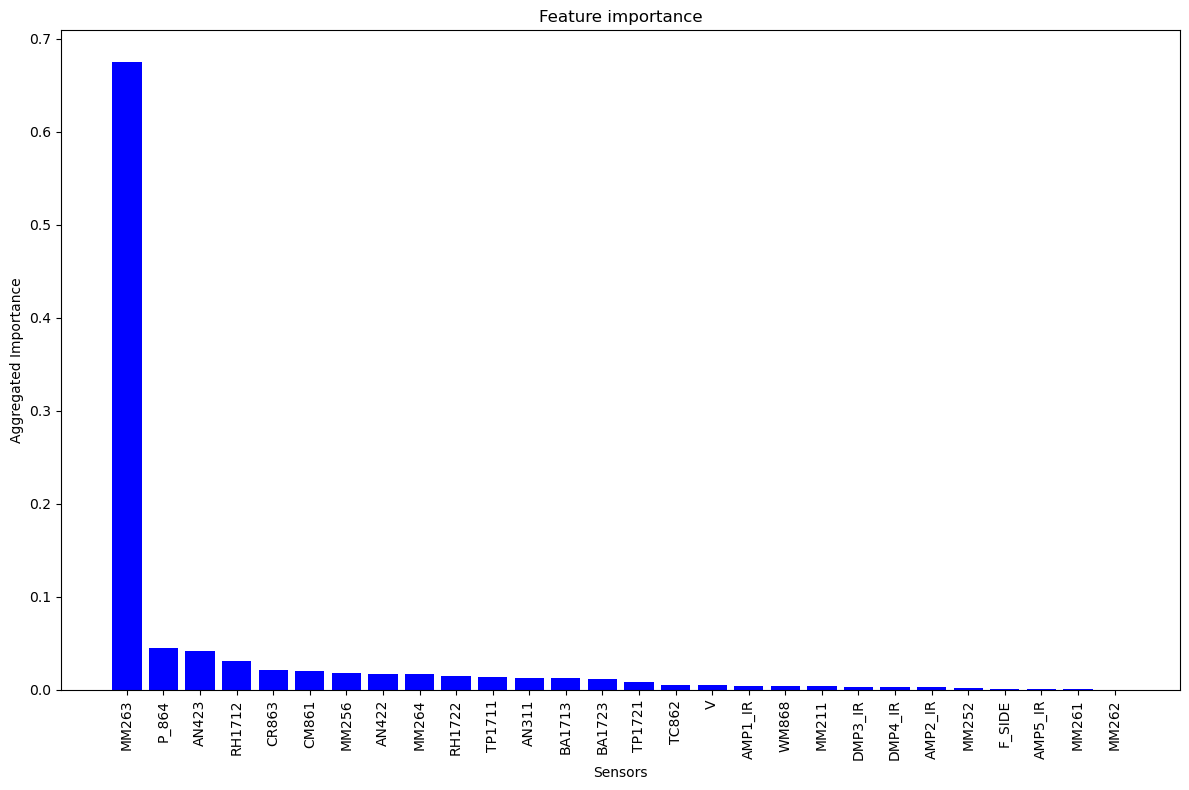

In [23]:
import pandas as pd
1
# Extract feature importances from the model
importances = rf_classifier_def.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Pair feature names with their importances
feature_importances = [(merged_train_df.columns[i], importances[i]) for i in indices]

# Convert list of tuples to a DataFrame for better visualization and manipulation
feature_importances_df = pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])

import pandas as pd
import numpy as np

# Extract feature importances from the model
importances = rf_classifier_def.feature_importances_
feature_names = merged_train_df.columns

# Create a DataFrame from features and their importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Allsensor names
sensors = [
    "AN311", "AN422", "AN423", "TP1721", "RH1722", "BA1723", "TP1711", "RH1712", "BA1713",
    "MM252", "MM261", "MM262", "MM263", "MM264", "MM256", "MM211", "CM861", "CR863", "P_864",
    "TC862", "WM868", "AMP1_IR", "AMP2_IR", "DMP3_IR", "DMP4_IR", "AMP5_IR", "F_SIDE", "V"
]

# Function to extract the base sensor name
def extract_sensor_name(feature_name):
    for sensor in sensors:
        if feature_name.startswith(sensor):
            return sensor
    return "Unknown Sensor"

# Apply the function to get sensor names
importance_df['Sensor'] = importance_df['Feature'].apply(extract_sensor_name)

# Group by Sensor and sum the importances
sensor_importances = importance_df.groupby('Sensor').sum().reset_index()

# Sort the sensors by their importance
sorted_sensor_importances = sensor_importances.sort_values(by='Importance', ascending=False)

# Print the sorted sensor importances
print(sorted_sensor_importances)

#nplot the sensor importances
plt.figure(figsize=(12, 8))
plt.bar(sorted_sensor_importances['Sensor'], sorted_sensor_importances['Importance'], color='b')
plt.xlabel('Sensors')
plt.ylabel('Aggregated Importance')
plt.title('Feature importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### With all features different parameters

In [25]:
def trainRF(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        class_weight='balanced'
    )
    rf_classifier.fit(X_train, y_train)
    return rf_classifier


In [26]:
rf_classifier_with_all_feat_01 = trainRF(n_estimators=700, max_depth=200, min_samples_split=100, min_samples_leaf=50, max_features='sqrt')

In [27]:
rf_probabilities_01 = rf_classifier_with_all_feat_01.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, rf_probabilities_01)
print(f"AUC with settings: {auc}")


# Probabilities for 'warning' class
thresholds = [0.01, 0.05,0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

print("Evaluating different thresholds:")

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities_01 >= threshold, 'warning', 'normal')

    balanced_acc = balanced_accuracy_score(y_test, predicted_labels)
    print(f"Balanced Accuracy: {balanced_acc}")

    # Print results
    print(f"\nThreshold: {threshold}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    
    cm = confusion_matrix(y_test, predicted_labels)
    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages
    print("Confusion Matrix:\n", cm)
    print("Confusion Matrix (%):\n", np.round(cm_percentage, 2))  # Printing the percentage matrix rounded to 2 decimal places


AUC with settings: 0.8666962223207411
Evaluating different thresholds:
Balanced Accuracy: 0.5449634832116107

Threshold: 0.01
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.15      0.26      5042
     warning       0.01      0.94      0.01        34

    accuracy                           0.15      5076
   macro avg       0.50      0.54      0.14      5076
weighted avg       0.99      0.15      0.26      5076

Confusion Matrix:
 [[ 750 4292]
 [   2   32]]
Confusion Matrix (%):
 [[14.88 85.12]
 [ 5.88 94.12]]
Balanced Accuracy: 0.7508458361527872

Threshold: 0.05
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.65      0.79      5042
     warning       0.02      0.85      0.03        34

    accuracy                           0.65      5076
   macro avg       0.51      0.75      0.41      5076
weighted avg       0.99      0.65      0.78      5076

Confusion Matrix:
 

In [28]:
rf_classifier_with_all_feat_01 = trainRF(n_estimators=800, max_depth=300, min_samples_split=100, min_samples_leaf=50, max_features='sqrt')

In [29]:
rf_probabilities_01 = rf_classifier_with_all_feat_01.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, rf_probabilities_01)
print(f"AUC with settings: {auc}")


# Probabilities for 'warning' class
thresholds = [0.01, 0.05,0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

print("Evaluating different thresholds:")

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities_01 >= threshold, 'warning', 'normal')

    balanced_acc = balanced_accuracy_score(y_test, predicted_labels)

    # Print results
    print(f"\nThreshold: {threshold}")
    print(f"Balanced Accuracy: {balanced_acc}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    
    cm = confusion_matrix(y_test, predicted_labels)
    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages
    print("Confusion Matrix:\n", cm)
    print("Confusion Matrix (%):\n", np.round(cm_percentage, 2))  # Printing the percentage matrix rounded to 2 decimal places


AUC with settings: 0.8644095480318268
Evaluating different thresholds:

Threshold: 0.01
Balanced Accuracy: 0.5463518211727373
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.15      0.26      5042
     warning       0.01      0.94      0.01        34

    accuracy                           0.16      5076
   macro avg       0.50      0.55      0.14      5076
weighted avg       0.99      0.16      0.26      5076

Confusion Matrix:
 [[ 764 4278]
 [   2   32]]
Confusion Matrix (%):
 [[15.15 84.85]
 [ 5.88 94.12]]

Threshold: 0.05
Balanced Accuracy: 0.7486641622138741
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.64      0.78      5042
     warning       0.02      0.85      0.03        34

    accuracy                           0.65      5076
   macro avg       0.51      0.75      0.41      5076
weighted avg       0.99      0.65      0.78      5076

Confusion Matrix:
 

In [30]:
rf_classifier_with_all_feat_03 = trainRF(n_estimators=700, max_depth=500, min_samples_split=200, min_samples_leaf=100, max_features='sqrt')

In [31]:
rf_probabilities_3 = rf_classifier_with_all_feat_03.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, rf_probabilities_3)
print(f"AUC with settings: {auc}")


# Probabilities for 'warning' class
thresholds = [0.01, 0.05,0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

print("Evaluating different thresholds:")

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities_3 >= threshold, 'warning', 'normal')

    balanced_acc = balanced_accuracy_score(y_test, predicted_labels)

    # Print results
    print(f"\nThreshold: {threshold}")
    print(f"Balanced Accuracy: {balanced_acc}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    
    cm = confusion_matrix(y_test, predicted_labels)
    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages
    print("Confusion Matrix:\n", cm)
    print("Confusion Matrix (%):\n", np.round(cm_percentage, 2))  # Printing the percentage matrix rounded to 2 decimal places


AUC with settings: 0.8815012716709055
Evaluating different thresholds:

Threshold: 0.01
Balanced Accuracy: 0.5510418368061227
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.13      0.23      5042
     warning       0.01      0.97      0.01        34

    accuracy                           0.14      5076
   macro avg       0.50      0.55      0.12      5076
weighted avg       0.99      0.14      0.23      5076

Confusion Matrix:
 [[ 663 4379]
 [   1   33]]
Confusion Matrix (%):
 [[13.15 86.85]
 [ 2.94 97.06]]

Threshold: 0.05
Balanced Accuracy: 0.7284632615442052
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.57      0.73      5042
     warning       0.01      0.88      0.03        34

    accuracy                           0.58      5076
   macro avg       0.51      0.73      0.38      5076
weighted avg       0.99      0.58      0.72      5076

Confusion Matrix:
 

In [32]:
rf_classifier_with_all_feat_04 = trainRF(n_estimators=1000, max_depth=800, min_samples_split=300, min_samples_leaf=200, max_features='sqrt')

In [33]:
rf_probabilities_4 = rf_classifier_with_all_feat_04.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, rf_probabilities_4)
print(f"AUC with settings: {auc}")


# Probabilities for 'warning' class
thresholds = [0.01, 0.05,0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

print("Evaluating different thresholds:")

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities_4 >= threshold, 'warning', 'normal')

    balanced_acc = balanced_accuracy_score(y_test, predicted_labels)

    # Print results
    print(f"\nThreshold: {threshold}")
    print(f"Balanced Accuracy: {balanced_acc}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    
    cm = confusion_matrix(y_test, predicted_labels)
    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages
    print("Confusion Matrix:\n", cm)
    print("Confusion Matrix (%):\n", np.round(cm_percentage, 2))  # Printing the percentage matrix rounded to 2 decimal places


AUC with settings: 0.8866871222904077
Evaluating different thresholds:

Threshold: 0.01
Balanced Accuracy: 0.5483934946449821
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.10      0.18      5042
     warning       0.01      1.00      0.01        34

    accuracy                           0.10      5076
   macro avg       0.50      0.55      0.10      5076
weighted avg       0.99      0.10      0.18      5076

Confusion Matrix:
 [[ 488 4554]
 [   0   34]]
Confusion Matrix (%):
 [[  9.68  90.32]
 [  0.   100.  ]]

Threshold: 0.05
Balanced Accuracy: 0.6752105840352801
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.47      0.64      5042
     warning       0.01      0.88      0.02        34

    accuracy                           0.47      5076
   macro avg       0.50      0.68      0.33      5076
weighted avg       0.99      0.47      0.63      5076

Confusion Matri

### Model without cutter loader features

In [ ]:
import pandas as pd

prefixes_to_remove = ['AMP1_IR', 'AMP2_IR', 'DMP3_IR', 'DMP4_IR', 'AMP5_IR', 'F_SIDE', 'V']

# Generate a list of columns to drop
columns_to_drop = [col for col in X_train.columns if any(col.startswith(prefix) for prefix in prefixes_to_remove)]

# Drop these columns from the DataFrame
X_train_new = X_train.drop(columns=columns_to_drop)
X_test_new = X_test.drop(columns=columns_to_drop)

In [40]:
## With defaultsettings
def trainRF():
    rf_classifier = RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    )
    rf_classifier.fit(X_train_new, y_train)
    return rf_classifier

rf_classifier_def = trainRF()

# Probabilities for 'warning' class
thresholds = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

rf_probabilities = rf_classifier_def.predict_proba(X_test_new)[:, 1]
# Compute ROC AUC for this threshold
auc = roc_auc_score(y_test, rf_probabilities)  # AUC remains the same as it's threshold-independent
print("AUC = ", auc)    

print("Evaluating different thresholds:")

# Store results for comparison
results = []

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities >= threshold, 'warning', 'normal')
    balanced_acc = balanced_accuracy_score(y_test, predicted_labels)
    
    # Generate classification report and confusion matrix
    report = classification_report(y_test, predicted_labels, output_dict=True)
    matrix = confusion_matrix(y_test, predicted_labels)
    
    # Print results
    print(f"\nThreshold: {threshold}")
    print(f"Balanced Accuracy: {balanced_acc}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    print("Confusion Matrix:")
    print(matrix)
    
    # Save results
    results.append({
        'threshold': threshold,
        'report': report,
        'matrix': matrix,
        'auc': auc
    })



AUC =  0.6309471031570106
Evaluating different thresholds:

Threshold: 0.001
Balanced Accuracy: 0.6289054296847656
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.67      0.80      5042
     warning       0.01      0.59      0.02        34

    accuracy                           0.67      5076
   macro avg       0.50      0.63      0.41      5076
weighted avg       0.99      0.67      0.80      5076

Confusion Matrix:
[[3376 1666]
 [  14   20]]

Threshold: 0.01
Balanced Accuracy: 0.6289054296847656
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.67      0.80      5042
     warning       0.01      0.59      0.02        34

    accuracy                           0.67      5076
   macro avg       0.50      0.63      0.41      5076
weighted avg       0.99      0.67      0.80      5076

Confusion Matrix:
[[3376 1666]
 [  14   20]]

Threshold: 0.05
Balanced Accuracy: 0.48

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa


Threshold: 0.2
Balanced Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.00      0.00      0.00        34

    accuracy                           0.99      5076
   macro avg       0.50      0.50      0.50      5076
weighted avg       0.99      0.99      0.99      5076

Confusion Matrix:
[[5042    0]
 [  34    0]]

Threshold: 0.3
Balanced Accuracy: 0.5
Classification Report:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.00      0.00      0.00        34

    accuracy                           0.99      5076
   macro avg       0.50      0.50      0.50      5076
weighted avg       0.99      0.99      0.99      5076

Confusion Matrix:
[[5042    0]
 [  34    0]]

Threshold: 0.4
Balanced Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.00      0.00      0.00        34

    accuracy                           0.99      5076
   macro avg       0.50      0.50      0.50      5076
weighted avg       0.99      0.99      0.99      5076

Confusion Matrix:
[[5042    0]
 [  34    0]]

Threshold: 0.5
Balanced Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.00

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [41]:
def trainRF(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        class_weight='balanced'
    )
    rf_classifier.fit(X_train_new, y_train)
    
    return rf_classifier


In [43]:
rf_classifier_without_cutterloader_01 = trainRF(n_estimators=700, max_depth=200, min_samples_split=100, min_samples_leaf=50, max_features='sqrt')

rf_probabilities_1 = rf_classifier_without_cutterloader_01.predict_proba(X_test_new)[:, 1]

auc = roc_auc_score(y_test, rf_probabilities_1)
print(f"AUC with settings: {auc}")


# Probabilities for 'warning' class
thresholds = [0.01, 0.05,0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

print("Evaluating different thresholds:")

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities_1 >= threshold, 'warning', 'normal')

    balanced_acc = balanced_accuracy_score(y_test, predicted_labels)

    # Print results
    print(f"\nThreshold: {threshold}")
    print(f"Balanced Accuracy: {balanced_acc}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    
    cm = confusion_matrix(y_test, predicted_labels)
    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages
    print("Confusion Matrix:\n", cm)
    print("Confusion Matrix (%):\n", np.round(cm_percentage, 2))  # Printing the percentage matrix rounded to 2 decimal places


AUC with settings: 0.8686795622652076
Evaluating different thresholds:

Threshold: 0.01
Balanced Accuracy: 0.5768544228480762
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.15      0.27      5042
     warning       0.01      1.00      0.02        34

    accuracy                           0.16      5076
   macro avg       0.50      0.58      0.14      5076
weighted avg       0.99      0.16      0.26      5076

Confusion Matrix:
 [[ 775 4267]
 [   0   34]]
Confusion Matrix (%):
 [[ 15.37  84.63]
 [  0.   100.  ]]

Threshold: 0.05
Balanced Accuracy: 0.7316366054553516
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.58      0.73      5042
     warning       0.01      0.88      0.03        34

    accuracy                           0.58      5076
   macro avg       0.51      0.73      0.38      5076
weighted avg       0.99      0.58      0.73      5076

Confusion Matri

In [44]:
rf_classifier_without_cutterloader_02 = trainRF(n_estimators=800, max_depth=300, min_samples_split=100, min_samples_leaf=50, max_features='sqrt')

rf_probabilities_2 = rf_classifier_without_cutterloader_02.predict_proba(X_test_new)[:, 1]

auc = roc_auc_score(y_test, rf_probabilities_2)
print(f"AUC with settings: {auc}")


# Probabilities for 'warning' class
thresholds = [0.01, 0.05,0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

print("Evaluating different thresholds:")

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities_2 >= threshold, 'warning', 'normal')

    balanced_acc = balanced_accuracy_score(y_test, predicted_labels)

    # Print results
    print(f"\nThreshold: {threshold}")
    print(f"Balanced Accuracy: {balanced_acc}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    
    cm = confusion_matrix(y_test, predicted_labels)
    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages
    print("Confusion Matrix:\n", cm)
    print("Confusion Matrix (%):\n", np.round(cm_percentage, 2))  # Printing the percentage matrix rounded to 2 decimal places


AUC with settings: 0.8715087383624612
Evaluating different thresholds:

Threshold: 0.01
Balanced Accuracy: 0.5708052360174534
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.14      0.25      5042
     warning       0.01      1.00      0.02        34

    accuracy                           0.15      5076
   macro avg       0.50      0.57      0.13      5076
weighted avg       0.99      0.15      0.25      5076

Confusion Matrix:
 [[ 714 4328]
 [   0   34]]
Confusion Matrix (%):
 [[ 14.16  85.84]
 [  0.   100.  ]]

Threshold: 0.05
Balanced Accuracy: 0.7294549315164384
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.58      0.73      5042
     warning       0.01      0.88      0.03        34

    accuracy                           0.58      5076
   macro avg       0.51      0.73      0.38      5076
weighted avg       0.99      0.58      0.73      5076

Confusion Matri

In [45]:
rf_classifier_without_cutterloader_03 = trainRF(n_estimators=700, max_depth=500, min_samples_split=200, min_samples_leaf=100, max_features='sqrt')

rf_probabilities_3 = rf_classifier_without_cutterloader_03.predict_proba(X_test_new)[:, 1]

auc = roc_auc_score(y_test, rf_probabilities_3)
print(f"AUC with settings: {auc}")


# Probabilities for 'warning' class
thresholds = [0.01, 0.05,0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

print("Evaluating different thresholds:")

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities_3 >= threshold, 'warning', 'normal')

    balanced_acc = balanced_accuracy_score(y_test, predicted_labels)

    # Print results
    print(f"\nThreshold: {threshold}")
    print(f"Balanced Accuracy: {balanced_acc}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    
    cm = confusion_matrix(y_test, predicted_labels)
    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages
    print("Confusion Matrix:\n", cm)
    print("Confusion Matrix (%):\n", np.round(cm_percentage, 2))  # Printing the percentage matrix rounded to 2 decimal places


AUC with settings: 0.8820496068320227
Evaluating different thresholds:

Threshold: 0.01
Balanced Accuracy: 0.5547401824672749
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.11      0.20      5042
     warning       0.01      1.00      0.01        34

    accuracy                           0.12      5076
   macro avg       0.50      0.55      0.11      5076
weighted avg       0.99      0.12      0.20      5076

Confusion Matrix:
 [[ 552 4490]
 [   0   34]]
Confusion Matrix (%):
 [[ 10.95  89.05]
 [  0.   100.  ]]

Threshold: 0.05
Balanced Accuracy: 0.6884989616632056
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.49      0.66      5042
     warning       0.01      0.88      0.02        34

    accuracy                           0.50      5076
   macro avg       0.51      0.69      0.34      5076
weighted avg       0.99      0.50      0.66      5076

Confusion Matri

In [46]:
rf_classifier_without_cutterloader_04 = trainRF(n_estimators=1000, max_depth=800, min_samples_split=300, min_samples_leaf=200, max_features='sqrt')

rf_probabilities_4 = rf_classifier_without_cutterloader_04.predict_proba(X_test_new)[:, 1]

auc = roc_auc_score(y_test, rf_probabilities_4)
print(f"AUC with settings: {auc}")


# Probabilities for 'warning' class
thresholds = [0.01, 0.05,0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

print("Evaluating different thresholds:")

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities_4 >= threshold, 'warning', 'normal')

    balanced_acc = balanced_accuracy_score(y_test, predicted_labels)

    # Print results
    print(f"\nThreshold: {threshold}")
    print(f"Balanced Accuracy: {balanced_acc}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    
    cm = confusion_matrix(y_test, predicted_labels)
    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages
    print("Confusion Matrix:\n", cm)
    print("Confusion Matrix (%):\n", np.round(cm_percentage, 2))  # Printing the percentage matrix rounded to 2 decimal places


AUC with settings: 0.8848146160487201
Evaluating different thresholds:

Threshold: 0.01
Balanced Accuracy: 0.5202300674335582
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.04      0.08      5042
     warning       0.01      1.00      0.01        34

    accuracy                           0.05      5076
   macro avg       0.50      0.52      0.05      5076
weighted avg       0.99      0.05      0.08      5076

Confusion Matrix:
 [[ 204 4838]
 [   0   34]]
Confusion Matrix (%):
 [[  4.05  95.95]
 [  0.   100.  ]]

Threshold: 0.05
Balanced Accuracy: 0.659244697482325
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.44      0.61      5042
     warning       0.01      0.88      0.02        34

    accuracy                           0.44      5076
   macro avg       0.50      0.66      0.31      5076
weighted avg       0.99      0.44      0.60      5076

Confusion Matrix